## MBON Proposal Map ##
Data from:
    - Glidder Track 
    - CalCOFI Stations
    - ACCESS Stations
    - NOAA SWFSC Rockfish Cruises
    - Trinidad Head Station

In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy, os
from cartopy import feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy import crs as ccrs
import datetime as dt
import json
import numpy as np
from cmocean import cm
import cmocean
import matplotlib.colors as colors

# from geopy.distance import vincenty
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import scipy.ndimage as ndimage


import salem
import geopandas as gpd

__Figure for MBON propsal__

Data sources to illustrate:
    - Rockfish Cruise stations
    - Calcofi
	- Glider lines
	- Wind/Wave buoys
	- ATN tracks
	- HFR
	- Chl-a
	- SST
	- eDNA - ships, LRAUV tracks, point sample

In [2]:
# Mapping helper function
def make_map(projection=ccrs.PlateCarree(),extent=(-130.5,-116.75,32,42)):
    fig, ax = plt.subplots(
        subplot_kw={'projection': projection},
        figsize=(12, 15)
    )
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    gl = ax.gridlines(draw_labels=True,)
    gl.xlines = False
    gl.ylines = False
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': 22}
    gl.ylabel_style = {'size': 22}
    gl.ylocator = mticker.FixedLocator(range(32,48,4))
    gl.xlocator = mticker.FixedLocator(range(-128,-100,4))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    
    land_10m  = cfeature.NaturalEarthFeature(category='physical', name='land',
                            scale='10m', facecolor="#bb8e5b", edgecolor='k')
    ax.add_feature(land_10m,zorder=20)
#     ocean_50m  = cfeature.NaturalEarthFeature(category='physical', name='ocean',
#                             scale='50m', facecolor=cfeature.COLORS['water'])
#     ax.add_feature(ocean_50m,zorder=0)
    return fig, ax

## Coastwatch Global Seascape Data

Global seascape prototype data is descibed as: "Biogeographic framework. Space and time classified simultaneously from synoptic time series using hierarchical and topology preserving machine learning"

Availible in portal at: http://cwcgom.aoml.noaa.gov/cgom/OceanViewer/#

THREDDS: http://cwcgom.aoml.noaa.gov/thredds/dodsC/SEASCAPE_MONTH/SEASCAPES.nc.html

### Coastal Relief Model

In [3]:
fname = '../Data/crm.nc'
ds_bathy = xr.open_dataset(fname)
elev = ds_bathy['Band1'] * -1
elv_smooth = ndimage.gaussian_filter(elev, sigma=2, order=0) # This is a smoothing function for the contours
# elev[elev>.5] = np.nan # This removes replaces all data that is above 0.5 meters in elevation
llon, llat = np.meshgrid(ds_bathy['lon'], ds_bathy['lat'])
levels = np.append(np.arange(-10,501,100), np.array((1000,1500,2000,3000,5000)))

## ACCESS Trawl stations

In [4]:
# Mapping helper function
def make_map_inlet(projection=ccrs.PlateCarree(),extent=(-123.75,-122.25,36.9,38.75)):
    fig, ax = plt.subplots(
        subplot_kw={'projection': projection},
    )
    fig.set_size_inches(8,8)
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    gl = ax.gridlines(draw_labels=True,)
    gl.xlines = False
    gl.ylines = False
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': 22}
    gl.ylabel_style = {'size': 22}
    gl.ylocator = mticker.FixedLocator(range(32,48,30))
    gl.xlocator = mticker.FixedLocator(range(-128,-100,10))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    
    land_10m  = cfeature.NaturalEarthFeature(category='physical', name='land',
                            scale='10m', facecolor="#bb8e5b", edgecolor='k',linewidths=1)
    ax.add_feature(land_10m, zorder=12)
#     ocean_50m  = cfeature.NaturalEarthFeature(category='physical', name='ocean',
#                             scale='50m', facecolor=cfeature.COLORS['water'])
#     ax.add_feature(ocean_50m,zorder=0)
    return fig, ax

# Mapping helper function
def make_map_inlet_humboldt(projection=ccrs.PlateCarree(),extent=(-125.85,-124,40.325,41.75)):
    fig, ax = plt.subplots(
        subplot_kw={'projection': projection},
#         figsize=(6, 6)
    )
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    gl = ax.gridlines(draw_labels=True,)
    gl.xlines = False
    gl.ylines = False
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': 22}
    gl.ylabel_style = {'size': 22}
    gl.ylocator = mticker.FixedLocator(range(32,48,4))
    gl.xlocator = mticker.FixedLocator(range(-128,-100,8))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    
    land_10m  = cfeature.NaturalEarthFeature(category='physical', name='land',
                            scale='10m', facecolor="#bb8e5b", edgecolor='k',linewidths=1)
    ax.add_feature(land_10m)
#     ocean_50m  = cfeature.NaturalEarthFeature(category='physical', name='ocean',
#                             scale='50m', facecolor=cfeature.COLORS['water'])
#     ax.add_feature(ocean_50m,zorder=0)
    return fig, ax

In [5]:
fname = '../Data/sanctuary_files/mbnms_py2/mbnms_py.shp'
mbnms = gpd.read_file(fname)
# fname = '/Users/patrick/Documents/CeNCOOS/store-locator/data/sanctuary_files/cbnms_py2/CBNMS_py.shp'
# cbnms = gpd.read_file(fname)
# fname = '/Users/patrick/Documents/CeNCOOS/store-locator/data/sanctuary_files/gfnms_py2/GFNMS_py.shp'
# gfnms = gpd.read_file(fname)
# fname = '/Users/patrick/Documents/CeNCOOS/store-locator/data/boem_call_areas_10_01_18/BOEM Call_Areas_10_01_18.shp'
# call_area_shapes = Reader(fname)
# # MPA
# file = "../MPA Project/MPA_dataview_prototype/Data/MPA Shapefiles/mpa_ca/mpa_caPolygon.shp"
# mpa_shapes_epsg = gpd.GeoDataFrame.from_file(file)
# print('Old projection:', mpa_shapes_epsg.crs['init'])
# mpa_shapes_WGS84 = mpa_shapes_epsg.to_crs({'proj':'longlat', 'ellps':'WGS84', 'datum':'WGS84'})
# mpa_shapes_WGS84.query("type == 'SMR' or type == 'SMP'").plot(color='#DB4343')
# mpa_shapes_WGS84.query("type == 'SMCA' or type == 'SMCA (No-Take)'").plot(color='#6192FB')
# mpa_shapes_WGS84['type'].unique()

/Users/patrick/anaconda3/lib/python3.7/site-packages/geopandas/_vectorized.py:142: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/Users/patrick/anaconda3/lib/python3.7/site-packages/geopandas/_vectorized.py:142: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  aout[:] = out


In [6]:
def plot_bathy(ax):
    ''' Plot the course bathymetery from natural Earth'''
    cmap = plt.get_cmap('Blues')
    norm = colors.Normalize(0, 10000)
    for letter, level in [('L', 0,),('K', 200),('J', 1000),  ('I', 2000),  ('H', 3000),  ('G', 4000)]:
        bathym = cfeature.NaturalEarthFeature(name='bathymetry_{}_{}'.format(letter, level),
                                     scale='10m', category='physical', zorder=0)
        ax.add_feature(bathym,facecolor=cmap(norm(level)), edgecolor='face')

/Users/patrick/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:49: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/patrick/anaconda3/lib/python3.7/site-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])
/Users/patrick/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)
/Users/patrick/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:49: ShapelyDepr

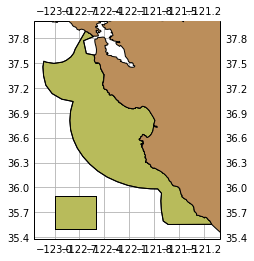

In [8]:
# fig, ax = make_map_inlet(extent=(-125,-120,42.5,34))
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
# ax.set_extent(extent, crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True,)

# plot_bathy(ax)

mbnms.plot(ax=ax,zorder=10,edgecolor="k",facecolor='#b8bb5b', linewidth=1)
mbnms.plot(ax=ax,zorder=10,alpha=1,edgecolor="k",facecolor='None', linewidth=1)

land_10m  = cfeature.NaturalEarthFeature(category='physical', name='land',
                            scale='10m', facecolor="#bb8e5b", edgecolor='k',linewidths=1)
ax.add_feature(land_10m, zorder=12)

# cbnms.plot(ax=ax, zorder=10,alpha=.85,edgecolor="k",facecolor='#bb5e5b', linewidth=0.5)
# cbnms.plot(ax=ax,zorder=10,alpha=1,edgecolor="k",facecolor='None', linewidth=1)

# gfnms.plot(ax=ax, zorder=10,alpha=.85,edgecolor="k", linewidth=0.5)
# gfnms.plot(ax=ax,zorder=10,alpha=1,edgecolor="k",facecolor='None', linewidth=1)

# ax.add_geometries(GF_shape.geometries(),ccrs.UTM(zone=10),facecolor='#bdbdbd',alpha=.85,edgecolor="k",lw=1,zorder=1,hatch='//')

# mpa_shapes_WGS84.query("type == 'SMR' or type == 'SMP'").plot(facecolor='#DB4343',edgecolor='k',ax=ax,zorder=13)
# mpa_shapes_WGS84.query("type == 'SMCA' or type == 'SMCA (No-Take)'").plot(facecolor='#6192FB',edgecolor='k',ax=ax,zorder=13)

# # plt.savefig('full_map.png', dpi=500,bbox_inches='tight', pad_inches=0)

In [9]:
def scale_bar(ax, length=None, location=(0.5, 0.05), linewidth=3):
    """
    ax is the axes to draw the scalebar on.
    length is the length of the scalebar in km.
    location is center of the scalebar in axis coordinates.
    (ie. 0.5 is the middle of the plot)
    linewidth is the thickness of the scalebar.
    """
    #Get the limits of the axis in lat long
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    #Make tmc horizontally centred on the middle of the map,
    #vertically at scale bar location
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]
    tmc = ccrs.TransverseMercator(sbllx, sblly)
    #Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(tmc)
    #Turn the specified scalebar location into coordinates in metres
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    #Calculate a scale bar length if none has been given
    #(Theres probably a more pythonic way of rounding the number but this works)
    if not length: 
        length = (x1 - x0) / 5000 #in km
        ndim = int(np.floor(np.log10(length))) #number of digits in number
        length = round(length, -ndim) #round to 1sf
        #Returns numbers starting with the list
        def scale_number(x):
            if str(x)[0] in ['1', '2', '5']: return int(x)        
            else: return scale_number(x - 10 ** ndim)
        length = scale_number(length) 

    #Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbx - length * 500, sbx + length * 500]
    #Plot the scalebar
    ax.plot(bar_xs, [sby, sby], transform=tmc, color='k', linewidth=linewidth)
    #Plot the scalebar label
    ax.text(sbx, sby, str(length) + ' km', transform=tmc,
            horizontalalignment='center', verticalalignment='bottom')

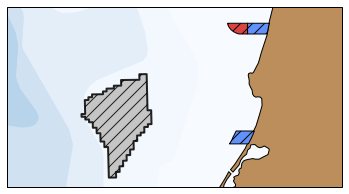

In [40]:
# fname = './trinidad_head_station_locations.csv'
# df_thl = pd.read_csv(fname)

fig, ax = make_map_inlet_humboldt(extent=(-125.1,-123.8,40.7,41.4))
plot_bathy(ax)

ax.add_geometries(GF_shape.geometries(),ccrs.UTM(zone=10),facecolor='#bdbdbd',alpha=.85,edgecolor="k",lw=2,zorder=1,hatch='//')

mpa_shapes_WGS84.query("type == 'SMR' or type == 'SMP'").plot(facecolor='#DB4343',edgecolor='k',ax=ax,zorder=9, hatch='//')
mpa_shapes_WGS84.query("type == 'SMCA' or type == 'SMCA (No-Take)'").plot(facecolor='#6192FB',edgecolor='k',ax=ax,zorder=9, hatch='//')



# scale_bar(ax, 50)

plt.savefig('trinidad_line_insert_strat.png',dpi=300, bbox_inches='tight', pad_inches=0)

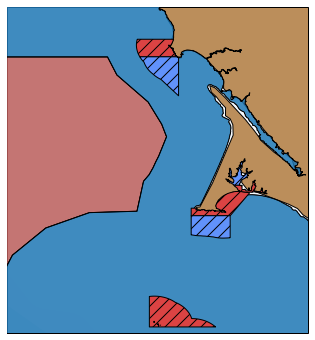

In [41]:
# fname = './trinidad_head_station_locations.csv'
# df_thl = pd.read_csv(fname)

fig, ax = make_map_inlet_humboldt(extent=(-123.4,-122.8,37.75,38.4))
fig.set_size_inches(6,6)
plot_bathy(ax)

ax.add_geometries(GF_shape.geometries(),ccrs.UTM(zone=10),facecolor='#bdbdbd',alpha=.85,edgecolor="k",lw=2,zorder=1,hatch='//')
mbnms.plot(ax=ax,zorder=10,edgecolor="k",facecolor='#b8bb5b', linewidth=1)
mbnms.plot(ax=ax,zorder=10,alpha=1,edgecolor="k",facecolor='None', linewidth=1)

cbnms.plot(ax=ax, zorder=10,alpha=.85,edgecolor="k",facecolor='#bb5e5b', linewidth=0.5)
cbnms.plot(ax=ax,zorder=10,alpha=1,edgecolor="k",facecolor='None', linewidth=1)

gfnms.plot(ax=ax, zorder=10,alpha=.85,edgecolor="k", linewidth=0.5)
gfnms.plot(ax=ax,zorder=10,alpha=1,edgecolor="k",facecolor='None', linewidth=1)
mpa_shapes_WGS84.query("type == 'SMR' or type == 'SMP'").plot(facecolor='#DB4343',edgecolor='k',ax=ax,zorder=13, hatch='//')
mpa_shapes_WGS84.query("type == 'SMCA' or type == 'SMCA (No-Take)'").plot(facecolor='#6192FB',edgecolor='k',ax=ax,zorder=13, hatch='//')



# scale_bar(ax, 50)

plt.savefig('sfbay_insert_strat.png',dpi=300, bbox_inches='tight', pad_inches=0)

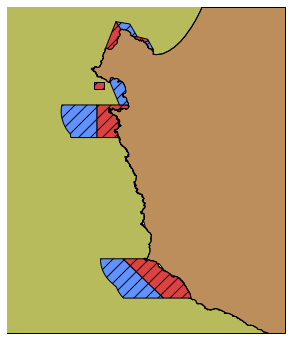

In [42]:
# fname = './trinidad_head_station_locations.csv'
# df_thl = pd.read_csv(fname)

fig, ax = make_map_inlet_humboldt(extent=(-122.1,-121.7,36.2,36.67))
fig.set_size_inches(6,6)
plot_bathy(ax)

ax.add_geometries(GF_shape.geometries(),ccrs.UTM(zone=10),facecolor='#bdbdbd',alpha=.85,edgecolor="k",lw=2,zorder=1,hatch='//')
mbnms.plot(ax=ax,zorder=10,edgecolor="k",facecolor='#b8bb5b', linewidth=1)
mbnms.plot(ax=ax,zorder=10,alpha=1,edgecolor="k",facecolor='None', linewidth=1)
mpa_shapes_WGS84.query("type == 'SMR' or type == 'SMP'").plot(facecolor='#DB4343',edgecolor='k',ax=ax,zorder=13, hatch='//')
mpa_shapes_WGS84.query("type == 'SMCA' or type == 'SMCA (No-Take)'").plot(facecolor='#6192FB',edgecolor='k',ax=ax,zorder=13, hatch='//')



# scale_bar(ax, 50)

plt.savefig('Mbay_insert_strat.png',dpi=300, bbox_inches='tight', pad_inches=0)

In [ ]:
# fname = './trinidad_head_station_locations.csv'
# df_thl = pd.read_csv(fname)

fig, ax = make_map_inlet_humboldt(extent=(-122.1,-121.7,36.2,36.67))
fig.set_size_inches(6,6)
plot_bathy(ax)

ax.add_geometries(GF_shape.geometries(),ccrs.UTM(zone=10),facecolor='#bdbdbd',alpha=.85,edgecolor="k",lw=2,zorder=1,hatch='//')
mbnms.plot(ax=ax,zorder=10,edgecolor="k",facecolor='#b8bb5b', linewidth=1)
mbnms.plot(ax=ax,zorder=10,alpha=1,edgecolor="k",facecolor='None', linewidth=1)
mpa_shapes_WGS84.query("type == 'SMR' or type == 'SMP'").plot(facecolor='#DB4343',edgecolor='k',ax=ax,zorder=13)
mpa_shapes_WGS84.query("type == 'SMCA' or type == 'SMCA (No-Take)'").plot(facecolor='#6192FB',edgecolor='k',ax=ax,zorder=13)


# scale_bar(ax, 50)

plt.savefig('Mbay_insert_strat.png',dpi=300, bbox_inches='tight', pad_inches=0)

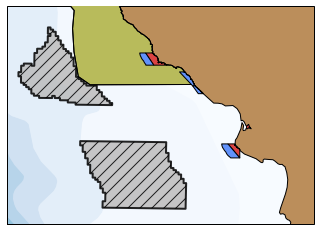

In [264]:

fig, ax = make_map_inlet_humboldt(extent=(-122.05,-120.5,34.85,35.95))
plot_bathy(ax)
mpa_shapes_WGS84.query("type == 'SMR' or type == 'SMP'").plot(facecolor='#DB4343',edgecolor='k',ax=ax,zorder=13)
mpa_shapes_WGS84.query("type == 'SMCA' or type == 'SMCA (No-Take)'").plot(facecolor='#6192FB',edgecolor='k',ax=ax,zorder=13)
ax.add_geometries(GF_shape.geometries(),ccrs.UTM(zone=10),facecolor='#bdbdbd',alpha=.85,edgecolor="k",lw=2,zorder=1,hatch='//')
# scale_bar(ax, 50, location = (-.01,-.01))
mbnms.plot(ax=ax,zorder=10,edgecolor="k",facecolor='#b8bb5b', linewidth=1)
mbnms.plot(ax=ax,zorder=10,alpha=1,edgecolor="k",facecolor='None', linewidth=1)
plt.savefig('morro_line_insert_strat.png',dpi=300, bbox_inches='tight', pad_inches=0)

### Add ATN Tracks

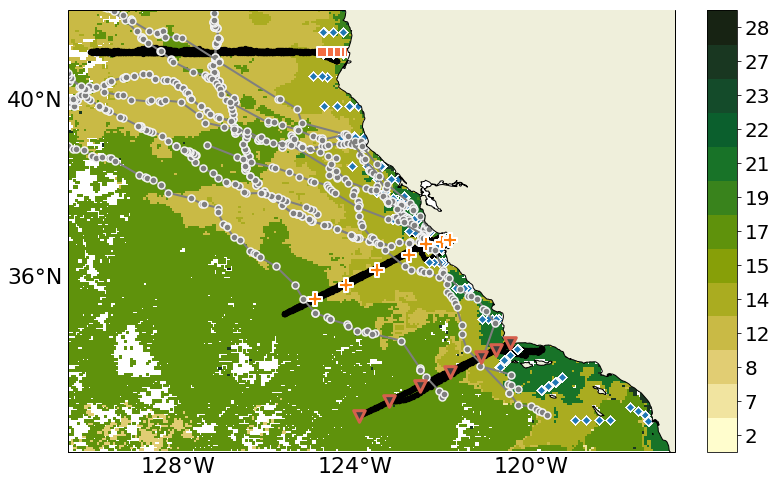

In [114]:
gliders_to_plot = ["sp058-20180126T1753",'UW157-20180417T1832',"Nemesis-20180830T0000","sp025-20180430T1727"]
fig, ax = make_map()
im = ax.pcolormesh(xx, yy, seasonal,transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap('cmo.speed', len(cat_key)))
# im = ax.pcolormesh(xx, yy, seasonal,transform=ccrs.PlateCarree(),cmap='cmo.amp')
divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=.45, axes_class=plt.Axes)
fig.add_axes(ax_cb)
formatter = plt.FuncFormatter(lambda val, loc: int(cat_values[int(val)]))
formatter = plt.FuncFormatter(lambda val, loc: int(cat_values[np.where(ticks == val)][0]))

cbar = plt.colorbar(im, cax=ax_cb, ticks=ticks,format=formatter)
cbar.ax.tick_params(labelsize=20) 

for i, name in enumerate(gliders_to_plot):
    df_temp = df_gliders[df_gliders['glider_name']==name]
    ax.scatter(df_temp['longitude (degrees_east)'], df_temp['latitude (degrees_north)'],s=75,marker='.',c='k') # Gliders

    
    
# temp_df = rf_2015[(rf_2015['station'] < 200) & (rf_2015['station'] < 200)]   
# ax.scatter(temp_df['longitude (degrees_east)'], temp_df['latitude (degrees_north)'], marker='.') # Rockfish
plot_seal_tracks(ax, atn_df)

ax.scatter(rf_2015['longitude (degrees_east)'], rf_2015['latitude (degrees_north)'], marker='D',edgecolor='w') # Rockfish
ax.scatter(df_thl['Lon'][:-3], df_thl['Lat'][:-3],marker='s',edgecolor='w',linewidths=2,c='#f46d43',s=115)

ax.scatter(df_c['longitude (degrees_east)'], df_c['latitude (degrees_north)'],c=".25", marker='v',linewidths=3,edgecolor='#d6604d', s=135,zorder=50) # calcofi
ax.scatter([-122.022,-122.378,-121.847,-122.772,-123.485,-124.195, -124.902],[36.747,36.697,36.797,36.453,36.120,35.786,35.453],marker='P',s=170,zorder=21,linewidths=2,edgecolor='w')


# fname = os.path.join('MBON_all_map.png')
# fname = '/Users/patrick/Documents/CeNCOOS/store-locator/data/sanctuary_files/gfnms_py2/GFNMS_py.shp'
# GF_shape = Reader(fname)
# ax.add_geometries(GF_shape.geometries(),ccrs.PlateCarree(),edgecolor='k',lw=2)
# fname = '/Users/patrick/Documents/CeNCOOS/store-locator/data/sanctuary_files/mbnms_py2/mbnms_py.shp'
# GF_shape = Reader(fname)
# ax.add_geometries(GF_shape.geometries(),ccrs.PlateCarree(),facecolor='#c51b8a',alpha=.85,edgecolor="k",lw=2)
# fname = '/Users/patrick/Documents/CeNCOOS/store-locator/data/sanctuary_files/cbnms_py2/CBNMS_py.shp'
# GF_shape = Reader(fname)
# ax.add_geometries(GF_shape.geometries(),ccrs.PlateCarree(),facecolor='#756bb1',alpha=.85,edgecolor="k",lw=2)

plt.savefig("MBON_all_map.png", dpi = 300, bbox_inches='tight', pad_inches=.5)

In [173]:
rf_2015['station'].unique()

array([139, 138, 237, 453, 454, 455, 461, 463, 464, 471, 473, 474, 112,
       115, 116, 114, 119, 123, 124, 125, 126, 131, 132, 133, 134, 135,
       117, 109, 110, 441, 442, 422, 404, 403, 402, 401, 484, 483, 482,
       481, 411, 412, 413, 414, 425, 424, 423, 491, 492, 493, 494, 495,
       443, 444, 211, 162, 160, 156, 152, 475, 602, 603, 605, 621, 623,
       625, 611, 613, 615, 165, 167, 171, 127, 101, 103, 104, 105, 106,
       154])

### SST Data

In [18]:
# ghrsst_NAVO-L4HR1m-GLOB-K10_SST
url="https://thredds.jpl.nasa.gov/thredds/dodsC/ncml_aggregation/OceanTemperature/ghrsst/aggregate__ghrsst_NAVO-L4HR1m-GLOB-K10_SST.ncml"
sst_ds = xr.open_dataset(url)
sst_recent = sst_ds.sel(time=slice(dt.datetime(2018,5,1),dt.datetime(2018,6,1)), lat=slice(42, 31), lon=slice(-130.5,-116.75)) #extent=(-130.5,-116.75,31,42))
xx,yy = np.meshgrid(sst_recent['lon'], sst_recent['lat'])

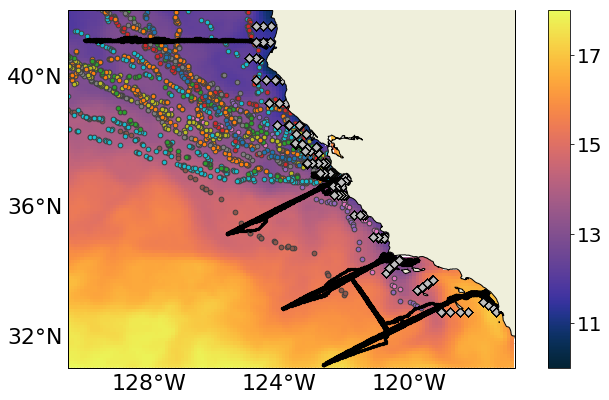

In [19]:
fig, ax = make_map()
im = ax.pcolormesh(xx, yy, sst_recent['analysed_sst'].mean(dim='time')-273.15, cmap=cm.thermal, vmin=10, vmax=18)
plot_seal_tracks(ax, atn_df)
ax.scatter(df_gliders['longitude (degrees_east)'], df_gliders['latitude (degrees_north)'],s=20,marker='.',c='k') # Gliders
ax.scatter(rf_2015['longitude (degrees_east)'], rf_2015['latitude (degrees_north)'],marker="D",edgecolor='k',c='.75') # Rockfish

divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=.45, axes_class=plt.Axes)
fig.add_axes(ax_cb)
cbar = plt.colorbar(im, cax=ax_cb,ticks=range(9,21,2))
cbar.ax.tick_params(labelsize=20) 
 
fname = os.path.join('MBON_sst_map.png')
# plt.savefig(fname, dpi = 300, bbox_inches='tight', pad_inches=.5)

## Georeference seascape raster

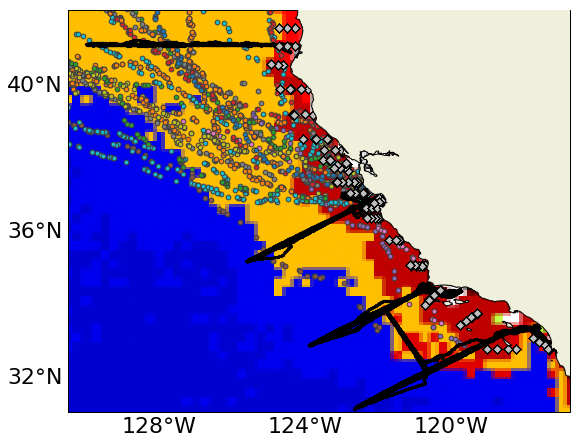

In [29]:
fig, ax = make_map()

img_extent = [-135, -90, 0, 60]
fname = "./MAY_CCS_seascape.jpg"

img = plt.imread(fname)
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
plot_seal_tracks(ax, atn_df)
ax.scatter(df_gliders['longitude (degrees_east)'], df_gliders['latitude (degrees_north)'],s=20,marker='.',c='k') # Gliders
ax.scatter(rf_2015['longitude (degrees_east)'], rf_2015['latitude (degrees_north)'],marker="D",edgecolor='k',c='.75') # Rockfish


fname = os.path.join('MBON_seascape_map.png')
plt.savefig(fname, dpi = 300, bbox_inches='tight', pad_inches=.5)

### Make Panel Maps

In [ ]:
# Mapping helper function
def make_map_panel(projection=ccrs.PlateCarree(),extent=(-130.5,-116.75,31,42),n=4,sharex=True):
    fig, ax = plt.subplots(nrows=2,ncols=2,
        subplot_kw={'projection': projection}
    )
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.05, hspace=.05)
    fig.set_size_inches(7,6)

    for i, ax_i in enumerate(ax.flatten()):
        ax_i.set_extent(extent, crs=ccrs.PlateCarree())
        gl = ax_i.gridlines(draw_labels=True,)
        gl.xlines = False
        gl.ylines = False
        gl.ylabels_right = False
        ax_i.coastlines('50m')
        ocean_50m  = cfeature.NaturalEarthFeature(category='physical', name='ocean',
                                scale='50m', facecolor=cfeature.COLORS['water'])
        ax_i.add_feature(ocean_50m,zorder=0)
        plt.xticks(rotation='vertical')
        gl.xlocator = mticker.FixedLocator(np.arange(-129,-117,3))
        gl.ylocator = mticker.FixedLocator(np.arange(32,42,3))
#         gl.xformatter = LONGITUDE_FORMATTER
#         gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 16}
        gl.ylabel_style = {'size': 16}
        if i == 0:
            gl.xlabels_bottom= False
            gl.xlabels_top= False
        elif i == 1:
            gl.ylabels_left = False
            gl.xlabels_bottom= False
            gl.xlabels_top= False
        elif i == 2:
            gl.ylabels_right= False
            gl.xlabels_top= False
        else:
            gl.ylabels_left= False
            gl.ylabels_right= False
            gl.xlabels_top= False

    return fig, ax.flatten()

# fig, ax = make_map_panel()

In [ ]:
fig, ax = make_map_panel()
ax[0].quiver(xx[ix],yy[ix],u.values[ix],v.values[ix],speed[ix],
          cmap=cm.speed,
          scale_units='xy',
          scale=.75) # HFR
ax[1].scatter(df_gliders['longitude (degrees_east)'], df_gliders['latitude (degrees_north)'],s=5,marker='.',c='k') # Gliders
ax[2].scatter(rf_2015['longitude (degrees_east)'], rf_2015['latitude (degrees_north)'], marker=".",c='k',s=3) # Rockfish
plot_seal_tracks(ax[3], atn_df)

fname = os.path.join('MBON_panel_map.png')
plt.savefig(fname, dpi = 300, bbox_inches='tight', pad_inches=.5)

In [ ]:
import folium
from folium.plugins import Fullscreen, MarkerCluster

m = folium.Map(location=[37.5, -122], tiles='OpenStreetMap', zoom_start=4)

Fullscreen(position='topright', force_separate_button=True).add_to(m)

marker_cluster0 = MarkerCluster(name='Observations')
marker_cluster0.add_to(m);

In [ ]:
# url = 'http://oos.soest.hawaii.edu/thredds/wms/hioos/satellite/dhw_5km'
# w0 = folium.WmsTileLayer(
#     url,
#     name='Sea Surface Temperature',
#     fmt='image/png',
#     layers='CRW_SST',
#     attr='PacIOOS TDS',
#     overlay=True,
#     transparent=True)

url = 'http://hfrnet.ucsd.edu/thredds/wms/HFRNet/USEGC/6km/hourly/RTV'
w1 = folium.WmsTileLayer(
    url,
    name='HF Radar',
    fmt='image/png',
    layers='surface_sea_water_velocity',
    attr='HFRNet',
    overlay=True,
    transparent=True)

# w0.add_to(m)
w1.add_to(m);

In [ ]:
def embed_map(m):
    from IPython.display import HTML

    m.save('index.html')
    with open('index.html') as f:
        html = f.read()

    srcdoc = html.replace('"', '&quot;')
    iframe = f'<iframe srcdoc="{srcdoc}" style="width: 100%; height: 750px; border: none"></iframe>'
    return HTML(iframe)